<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Algorithmic Trading

## With Machine & Deep Learning

**Simple Neural Network with Python**

**_ODSC Europe 2017_**

Dr. Yves J. Hilpisch

The Python Quants GmbH

**12. October 2017**

<img src="http://hilpisch.com/images/finaince_visual_low.png" width=50% align=left>

## The Imports

In [1]:
import numpy as np
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

## Neural Network for Regression

[Regression & Neural Networks](https://www.cs.cmu.edu/afs/cs.cmu.edu/academic/class/15381-s06/www/nn.pdf)

### Linear OLS Regression

In [4]:
x = np.linspace(0, 10, 5)
y = 3 * x + 2.5 + np.random.standard_normal(len(x)) * 2.5

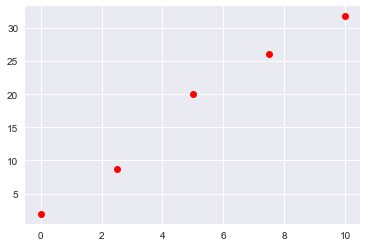

In [5]:
plt.plot(x, y, 'ro')

In [6]:
reg = np.polyfit(x, y, deg=1)

In [7]:
reg

array([ 3.07911321,  2.30812166])

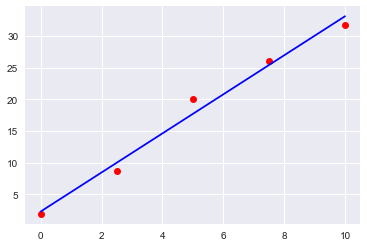

In [8]:
yr = np.polyval(reg, x)
plt.plot(x, y, 'ro')
plt.plot(x, yr, 'b')

In [9]:
((y - yr) ** 2).mean()

1.8626631671489828

### Network Training &mdash; Single Step

In [10]:
l0 = np.array((x, len(x) * [1])).T

In [11]:
l0

array([[  0. ,   1. ],
       [  2.5,   1. ],
       [  5. ,   1. ],
       [  7.5,   1. ],
       [ 10. ,   1. ]])

In [12]:
weights = np.array(((2., 2.)))

In [13]:
l1 = np.dot(l0, weights)
l1

array([  2.,   7.,  12.,  17.,  22.])

In [14]:
y

array([  1.93179013,   8.74393117,  20.03072506,  26.03864282,  31.77334948])

In [15]:
d = y - l1
d

array([-0.06820987,  1.74393117,  8.03072506,  9.03864282,  9.77334948])

In [16]:
(d ** 2).mean()  # MSE

48.950783490523314

In [17]:
alpha = 0.01  # learning rate

In [38]:
update = alpha * np.dot(d, l0)
update

array([-1.30138166, -0.17258916])

In [39]:
weights += update  # updating weights

In [40]:
weights

array([ 2.47922891,  2.07982898])

In [41]:
l1 = np.dot(l0, weights)
d = y - l1
(d ** 2).mean()  # new MSE

16.779067000524929

### Network Training &mdash; Multi Step

In [42]:
weights = np.array(((1., 100.)))

In [54]:
for _ in range(51):
    # layer 1
    l1 = np.dot(l0, weights)

    # deltas of layer 1
    d = y - l1
    
    # print MSE
    if _ % 5 == 0:
        print('MSE after %4d iterations: %6.2f' % (_, (d ** 2).mean()))

    # update weights based on deltas
    weights += alpha * np.dot(d, l0)

MSE after    0 iterations:   1.86
MSE after    5 iterations:   1.86
MSE after   10 iterations:   1.86
MSE after   15 iterations:   1.86
MSE after   20 iterations:   1.86
MSE after   25 iterations:   1.86
MSE after   30 iterations:   1.86
MSE after   35 iterations:   1.86
MSE after   40 iterations:   1.86
MSE after   45 iterations:   1.86
MSE after   50 iterations:   1.86


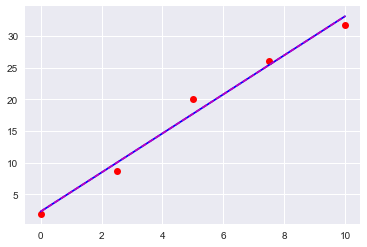

In [55]:
yr = np.polyval(reg, x)
plt.plot(x, y, 'ro')
plt.plot(x, yr, 'b')
plt.plot(x, l1, 'm--')

## Neural Network for Classification

https://iamtrask.github.io/2015/07/12/basic-python-network/

### Sigmoid Function

https://en.wikipedia.org/wiki/Sigmoid_function

In [56]:
# sigmoid function
def sigmoid(x, deriv=False):
    if deriv == True:
        return sigmoid(x) * (1 - sigmoid(x))
    return 1 / (1 + np.exp(-x))

In [57]:
x = np.linspace(-10, 10, 250)
y = sigmoid(x)
d = sigmoid(x, deriv=True)

In [58]:
s = np.where(x > 0, 1, 0)

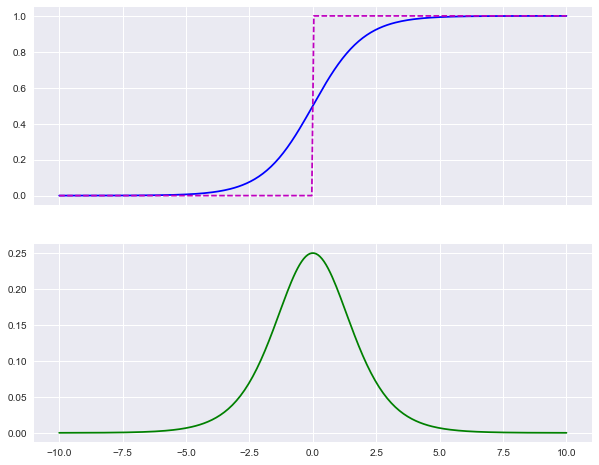

In [59]:
fig, ax = plt.subplots(2, sharex=True, figsize=(10, 8))
ax[0].plot(x, y, 'b')
ax[0].plot(x, s, 'm--')

ax[1].plot(x, d, 'g');

### The Data

In [60]:
# input dataset (features)
# layer 0
l0 = np.array([[0, 0, 1],
               [0, 1, 1],
               [1, 0, 1],
               [1, 1, 1] ])

In [61]:
# output dataset (labels)          
y = np.array([[0,
               0,
               1,
               1]]).T

### Single Step

In [62]:
# initialize weights randomly with mean 0
np.random.seed(1)
weights = 2 * np.random.random((3, 1)) - 1
weights

array([[-0.16595599],
       [ 0.44064899],
       [-0.99977125]])

In [63]:
np.dot(l0, weights)

array([[-0.99977125],
       [-0.55912226],
       [-1.16572724],
       [-0.72507825]])

In [64]:
l1 = sigmoid(np.dot(l0, weights))
l1

array([[ 0.2689864 ],
       [ 0.36375058],
       [ 0.23762817],
       [ 0.3262757 ]])

In [65]:
e = y - l1
e

array([[-0.2689864 ],
       [-0.36375058],
       [ 0.76237183],
       [ 0.6737243 ]])

In [66]:
(e ** 2).mean()

0.30994584990928159

In [67]:
sigmoid(l1, True)

array([[ 0.24553187],
       [ 0.24190935],
       [ 0.24650375],
       [ 0.24346281]])

In [76]:
d = e * sigmoid(l1, True)
d

array([[-0.08078977],
       [-0.10913116],
       [ 0.13276581],
       [ 0.0976164 ]])

In [77]:
u = np.dot(l0.T, d)
u

array([[ 0.23038221],
       [-0.01151477],
       [ 0.04046127]])

In [78]:
weights += u
weights

array([[ 0.69786493],
       [ 0.52671961],
       [-0.65799498]])

In [79]:
l1 = sigmoid(np.dot(l0, weights))
e = y - l1
(e ** 2).mean()

0.17647688814866808

### Multiple Steps

In [80]:
# initialize weights randomly with mean 0
np.random.seed(1)
weights = 2 * np.random.random((3, 1)) - 1
weights

array([[-0.16595599],
       [ 0.44064899],
       [-0.99977125]])

In [81]:
for _ in range(1001):
    # forward propagation
    # layer 1
    l1 = sigmoid(np.dot(l0, weights))

    # errors of layer 1
    e = y - l1
    if _ % 200 == 0:
        print('\nafter %d iterations' % _)
        print('layer 1:', l1.T)
        print('errors: ', e.T)
        print('MSE:    ', (e ** 2).mean())

    # multiply errors by the slope of the 
    # sigmoid at the values in l1
    d = e * sigmoid(l1, True)

    # update weights
    weights += np.dot(l0.T, d)


after 0 iterations
layer 1: [[ 0.2689864   0.36375058  0.23762817  0.3262757 ]]
errors:  [[-0.2689864  -0.36375058  0.76237183  0.6737243 ]]
MSE:     0.309945849909

after 200 iterations
layer 1: [[ 0.03581881  0.02486184  0.97910131  0.96983694]]
errors:  [[-0.03581881 -0.02486184  0.02089869  0.03016306]]
MSE:     0.000811915861218

after 400 iterations
layer 1: [[ 0.01812805  0.01228468  0.98963848  0.98469571]]
errors:  [[-0.01812805 -0.01228468  0.01036152  0.01530429]]
MSE:     0.000205280470873

after 600 iterations
layer 1: [[ 0.01210241  0.00814395  0.99312159  0.98977191]]
errors:  [[-0.01210241 -0.00814395  0.00687841  0.01022809]]
MSE:     9.11796267574e-05

after 800 iterations
layer 1: [[ 0.00907573  0.00608783  0.99485433  0.99232527]]
errors:  [[-0.00907573 -0.00608783  0.00514567  0.00767473]]
MSE:     5.1202496537e-05

after 1000 iterations
layer 1: [[ 0.00725744  0.00485959  0.99589051  0.9938605 ]]
errors:  [[-0.00725744 -0.00485959  0.00410949  0.0061395 ]]
MSE:  

<img src="http://hilpisch.com/tpq_logo.png" width=350px align="right">